In [165]:
import pandas as pd
import numpy as np


In [166]:
df = pd.read_csv("D:\\Machine_learning\\Decesion_tree\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
df = df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis="columns")
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [168]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [169]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [170]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [171]:
label = LabelEncoder()
# joblib.dump(label,"label.jb")
label.fit(df['Sex'])

LabelEncoder()

In [172]:
df['Sex'] = label.transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [174]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Survived'],axis='columns'),df['Survived'], test_size=0.2,random_state=10)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
# joblib.dump(model,"model.jb")


DecisionTreeClassifier()

In [175]:
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.8100558659217877

<function matplotlib.pyplot.show(close=None, block=None)>

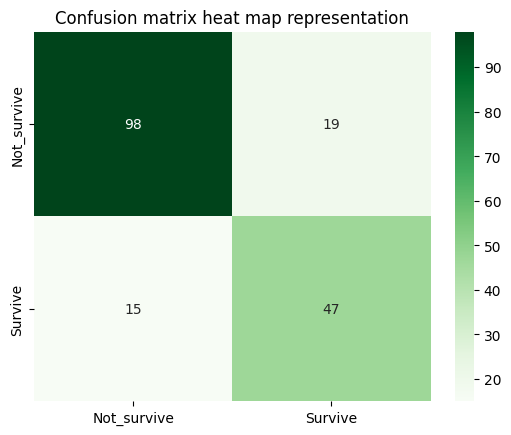

In [176]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Greens',annot=True,xticklabels=['Not_survive','Survive'],yticklabels=['Not_survive','Survive'])
plt.title("Confusion matrix heat map representation")
plt.show